### Libraries

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn import decomposition
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

### Loading dataset

In [37]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)

### PCA Digits

In [38]:
standardized_data = StandardScaler().fit_transform(data)
# initializing the pca
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (1797, 3)


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


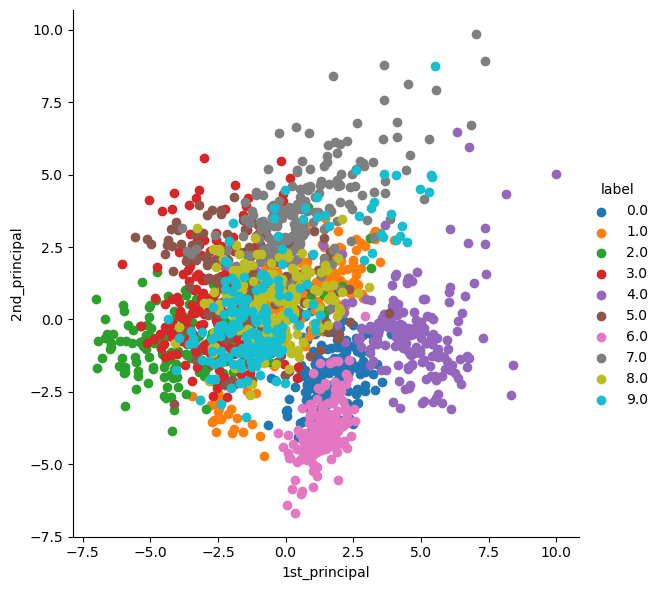

In [39]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### MSD Digits

In [34]:
standardized_data = MinMaxScaler().fit_transform(data)
#(1797, 64)
embedding = MDS(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, labels)).T

c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


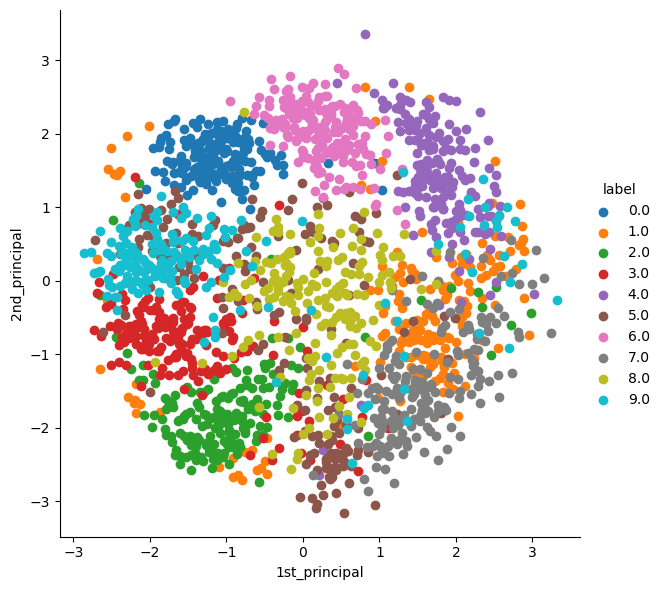

In [35]:
mds_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(mds_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### TSNE

In [40]:
standardized_data = MinMaxScaler().fit_transform(data)
#(1797, 64)
embedding = TSNE(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, labels)).T

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


c:\Users\afrincon\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


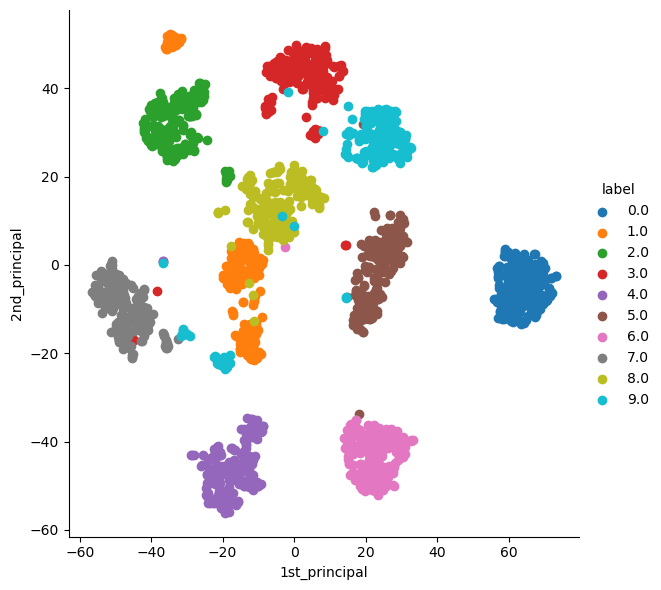

In [44]:
mds_df = pd.DataFrame(data=X_transformed, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(mds_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()